In [25]:

import pandas as pd # For data manipulation
import numpy as np # For numerical operations
import glob # to read all the files at once
import os # Get the current working directory
import dill # For saving and loading Python objects
import matplotlib.pyplot as plt # For plotting
import seaborn as sns
import scipy.stats as stats # For statistical tests

In [ ]:
# os.chdir('/Users/daniil/Library/CloudStorage/OneDrive-IndianaUniversity/Documents/Experiments/IU/Memorability Rocks/Exp1/Exp1_analysis') # Change to the directory where the data is stored

In [2]:
# Load and automatically restore all variables to global namespace
with open("Exp1_analysis.pkl", "rb") as f:
    loaded_vars = dill.load(f)
    globals().update(loaded_vars)

print(f"Loaded {len(loaded_vars)} variables:", list(loaded_vars.keys()))

Loaded 1 variables: ['credited_IDs']


# Load data

In [101]:
# Read Data

# Path to your Data folder
data_folder = 'Data'

# Get all JSON files in the folder
files = glob.glob(os.path.join(data_folder, '*.json'))

# Read and concatenate all files
data_frames = [pd.read_json(file) for file in files]
data_set = pd.concat(data_frames, ignore_index=True)
data_set.head(10)

,width,height,webaudio,browser,browser_version,mobile,os,fullscreen,vsync_rate,webcam,...,task,broad_category,image_png,image_id,category_name,category,distinct_rating,correct_response,item_type,cor_ans
0,1512.0,790.0,1.0,chrome,139.0.0,0.0,Mac OS,1.0,122.03,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,memory_phase,M,M_Migmatite_13.png,253.0,Migmatite,16.0,5.01,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,memory_phase,I,I_Rhyolite_02.png,146.0,Rhyolite,10.0,3.26,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filter data

In [102]:
# Memory phase data
filtered_data_memory = data_set.loc[
    data_set['task'] == 'memory_phase',
    ['trial_index','subject_id', 'group','task','item_type',
     'category_name','category','broad_category',
     'image_png','image_id','distinct_rating']
    ].copy()
filtered_data_memory = filtered_data_memory.astype({
    "subject_id": "category", "broad_category": "category",
    "image_id": "int", "category_name": "category",
    "category": "int"
    })
filtered_data_memory.head(10)

,trial_index,subject_id,group,task,item_type,category_name,category,broad_category,image_png,image_id,distinct_rating
6,6,86303,Group2,memory_phase,NaN,Migmatite,16,M,M_Migmatite_13.png,253,5.01
8,8,86303,Group2,memory_phase,NaN,Rhyolite,10,I,I_Rhyolite_02.png,146,3.26
10,10,86303,Group2,memory_phase,NaN,Gabbro,4,I,I_Gabbro_16.png,64,2.52
12,12,86303,Group2,memory_phase,NaN,Pumice,9,I,I_Pumice_08.png,136,3.10
14,14,86303,Group2,memory_phase,NaN,Micrite,26,S,S_Micrite_12.png,412,3.14
16,16,86303,Group2,memory_phase,NaN,Amphibolite,11,M,M_Amphibolite_05.png,165,3.59
18,18,86303,Group2,memory_phase,NaN,Gabbro,4,I,I_Gabbro_06.png,54,3.26
20,20,86303,Group2,memory_phase,NaN,Sandstone,29,S,S_Sandstone_08.png,456,1.50
22,22,86303,Group2,memory_phase,NaN,Conglomerate,24,S,S_Conglomerate_06.png,374,4.24
24,24,86303,Group2,memory_phase,NaN,Hornfels,14,M,M_Hornfels_13.png,221,3.20


In [103]:
# Test phase data
filtered_data_test = data_set.loc[
    data_set['task'] == 'test_phase',
    ['trial_index','subject_id', 'group','task','item_type',
     'response','correct_response', 'cor_ans','rt', 
     'category_name', 'category','broad_category',
     'image_png', 'image_id', 'distinct_rating']
    ].copy()
filtered_data_test = filtered_data_test.astype({
    "subject_id": "category",
    "group": "category",
    'item_type': "category",
    "broad_category": "category",
    "image_id": "int",
    "category_name": "category",
    "category": "int",
    "cor_ans": "bool"
    })

filtered_data_test.head(10)

,trial_index,subject_id,group,task,item_type,response,correct_response,cor_ans,rt,category_name,category,broad_category,image_png,image_id,distinct_rating
490,490,86303,Group2,test_phase,Foil,a,a,True,2492.0,Peridotite,8,I,I_Peridotite_05.png,117,3.89
492,492,86303,Group2,test_phase,Target,a,l,False,1918.0,Chert,23,S,S_Chert_11.png,363,7.12
494,494,86303,Group2,test_phase,Foil,a,a,True,885.0,Marble,15,M,M_Marble_09.png,233,4.25
496,496,86303,Group2,test_phase,Target,a,l,False,782.0,Diorite,3,I,I_Diorite_04.png,36,2.98
498,498,86303,Group2,test_phase,Target,a,l,False,1784.0,Breccia,22,S,S_Breccia_09.png,345,6.70
500,500,86303,Group2,test_phase,Foil,a,a,True,1412.0,Pegmatite,7,I,I_Pegmatite_09.png,105,6.37
502,502,86303,Group2,test_phase,Foil,a,a,True,2528.0,Rock Salt,28,S,S_Rock Salt_10.png,442,4.00
504,504,86303,Group2,test_phase,Foil,l,a,False,1180.0,Obsidian,6,I,I_Obsidian_13.png,93,4.85
506,506,86303,Group2,test_phase,Foil,a,a,True,1739.0,Bituminous Coal,21,S,S_Bituminous Coal_13.png,333,5.06
508,508,86303,Group2,test_phase,Foil,a,a,True,1318.0,Peridotite,8,I,I_Peridotite_06.png,118,5.78


# Grant credit for participation

In [104]:
percent_cor_IDs = (filtered_data_test
 .groupby(['subject_id','group'], observed=True)['cor_ans']
 .mean() # mean per subject
 .reset_index()
 )
percent_cor_IDs['cor_ans'].describe()  # descriptive statistics across subjects

count    106.000000
mean       0.515645
std        0.030304
min        0.456250
25%        0.498437
50%        0.512500
75%        0.531250
max        0.606250
Name: cor_ans, dtype: float64

In [165]:
# t-test compare with chance level (0.5)
stats.ttest_1samp(percent_cor_IDs['cor_ans'], popmean=0.5)

TtestResult(statistic=5.315168737316415, pvalue=6.030981819345234e-07, df=105)

In [166]:
# by group
(percent_cor_IDs
 .groupby('group', observed=True)['cor_ans']
 .agg(['mean','std','count','sem'])
 )

,mean,std,count,sem
group,,,,
Group1,0.515027,0.026024,47,0.003796
Group2,0.516137,0.033538,59,0.004366


In [167]:
# compare two groups
stats.ttest_ind(percent_cor_IDs.loc[percent_cor_IDs['group'] == 'Group1', 'cor_ans'],
                percent_cor_IDs.loc[percent_cor_IDs['group'] == 'Group2', 'cor_ans'])

TtestResult(statistic=-0.18655124832472628, pvalue=0.8523759091960857, df=104.0)

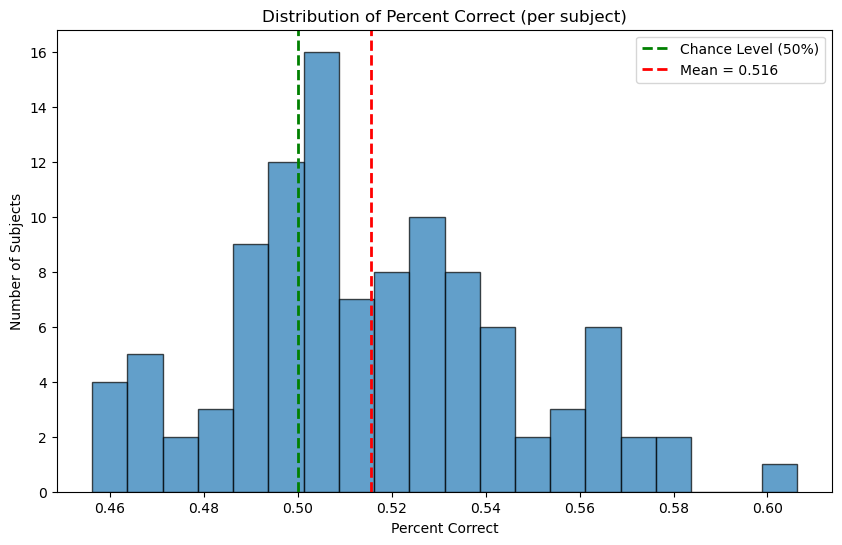

In [168]:
# unified plot
plt.figure(figsize=(10, 6))
plt.hist(percent_cor_IDs['cor_ans'], bins=20, edgecolor="black", alpha=0.7)
plt.axvline(0.5, color='green', linestyle='dashed', linewidth=2, label='Chance Level (50%)')
plt.axvline(percent_cor_IDs['cor_ans'].mean(), color='red', 
            linestyle='dashed', linewidth=2, label=f'Mean = {percent_cor_IDs["cor_ans"].mean():.3f}')
plt.xlabel("Percent Correct")
plt.ylabel("Number of Subjects")
plt.title("Distribution of Percent Correct (per subject)")
plt.legend()
plt.show()

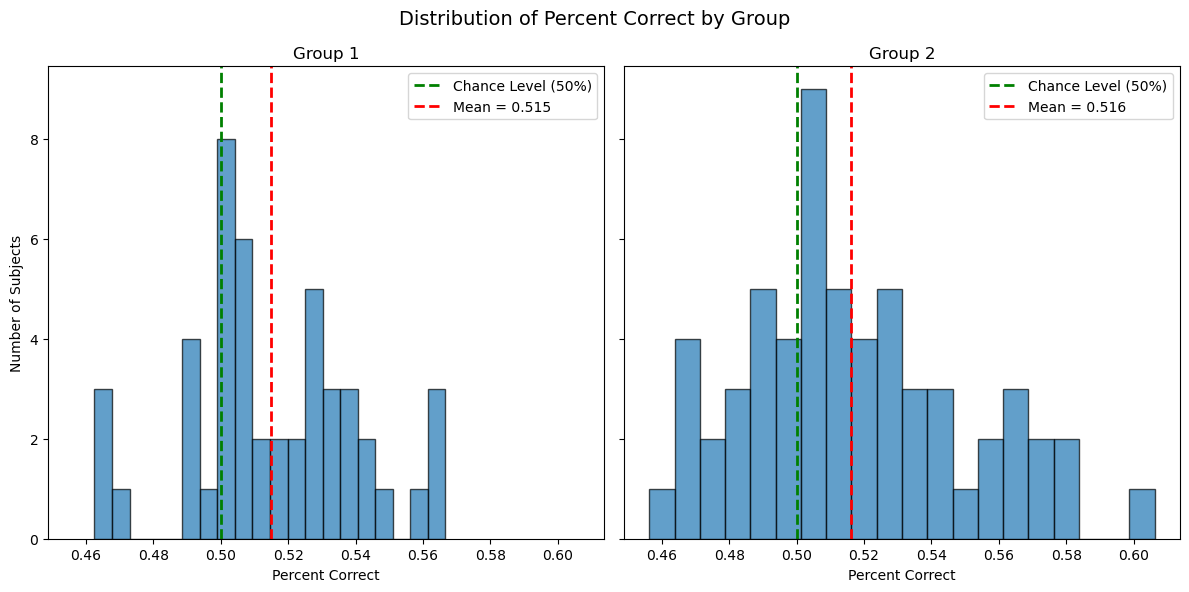

In [169]:
# by groups
groups = np.sort(percent_cor_IDs["group"].unique())
fig, axes = plt.subplots(1, len(groups), # rows, cols
                         figsize=(12, 6), 
                         sharey=True,sharex=True # share x and y axis scales
                         )

for ax, g in zip(axes, groups):
    data = percent_cor_IDs.loc[percent_cor_IDs["group"] == g, "cor_ans"]
    ax.hist(data, bins=20, edgecolor="black", alpha=0.7)
    
    # Chance level
    ax.axvline(.50, color="green", linestyle="dashed", linewidth=2, label="Chance Level (50%)")
    # Group mean
    ax.axvline(data.mean(), color="red", linestyle="dashed", linewidth=2, label=f"Mean = {data.mean():.3f}")
    
    ax.set_title(f"Group {g[-1]}") # g = 'Group1' or 'Group2', so g[-1] is '1' or '2'
    ax.set_xlabel("Percent Correct")
    ax.legend()

axes[0].set_ylabel("Number of Subjects")
fig.suptitle("Distribution of Percent Correct by Group", fontsize=14)
plt.tight_layout()
plt.show()

In [110]:
# Get unique subject IDs from data
all_IDs = filtered_data_test['subject_id'].unique()

# Compute difference
not_credited_yet = [id for id in all_IDs if id not in credited_IDs]

print(not_credited_yet)

[88736, 88868, 87854, 88783, 87964, 88824, 88927, 87579, 88929, 88860, 89436, 88619, 86824, 87451, 88974, 87358, 86422, 87474, 88534, 87820, 88373, 86437]


In [111]:
len(not_credited_yet) # Number of subjects not credited yet

22

In [112]:
credited_IDs = filtered_data_test['subject_id'].unique()

In [113]:
credited_IDs

[86303, 88472, 88976, 87197, 88736, ..., 88534, 87820, 88373, 86437, 86402]
Length: 106
Categories (106, int64): [86271, 86284, 86303, 86312, ..., 89436, 89518, 89550, 89873]

# d-prime

In [114]:
# hits
hits_IDs = (filtered_data_test
 .loc[filtered_data_test['item_type'] == 'Target'] # only hits
 .groupby(['subject_id'], observed=True)['cor_ans']
 .mean() # mean per subject
 .reset_index()
 .rename(columns={'cor_ans': 'Hit_rate'})
 )
hits_IDs['Hit_rate'].describe()  # descriptive statistics across subjects

count    106.000000
mean       0.597091
std        0.080210
min        0.295833
25%        0.562500
50%        0.600000
75%        0.650000
max        0.762500
Name: Hit_rate, dtype: float64

In [115]:
CRs_IDs = (filtered_data_test
 .loc[filtered_data_test['item_type'] == 'Foil'] # only hits
 .groupby(['subject_id'], observed=True)['cor_ans']
 .mean() # mean per subject
 .reset_index()
 .rename(columns={'cor_ans': 'CR_rate'})
 )
CRs_IDs['CR_rate'].describe()

count    106.000000
mean       0.434198
std        0.086237
min        0.270833
25%        0.380208
50%        0.429167
75%        0.478125
max        0.854167
Name: CR_rate, dtype: float64

In [116]:
dprime_ID = pd.merge(hits_IDs, CRs_IDs, on='subject_id')
dprime_ID['FA_rate'] = 1 - dprime_ID['CR_rate']
dprime_ID['dprimes'] = [stats.norm.ppf(hit) - stats.norm.ppf( (1-cr) ) 
  for hit, cr 
  in zip(dprime_ID['Hit_rate'], dprime_ID['CR_rate'])
  ]

dprime_ID

,subject_id,Hit_rate,CR_rate,FA_rate,dprimes
0,86271,0.295833,0.854167,0.145833,0.518050
1,86284,0.579167,0.395833,0.604167,-0.064385
2,86303,0.616667,0.295833,0.704167,-0.239685
3,86312,0.595833,0.329167,0.670833,-0.199639
4,86316,0.600000,0.525000,0.475000,0.316054
...,...,...,...,...,...
101,89400,0.537500,0.491667,0.508333,0.073247
102,89436,0.604167,0.458333,0.541667,0.159514
103,89518,0.558333,0.466667,0.533333,0.063093
104,89550,0.625000,0.375000,0.625000,0.000000


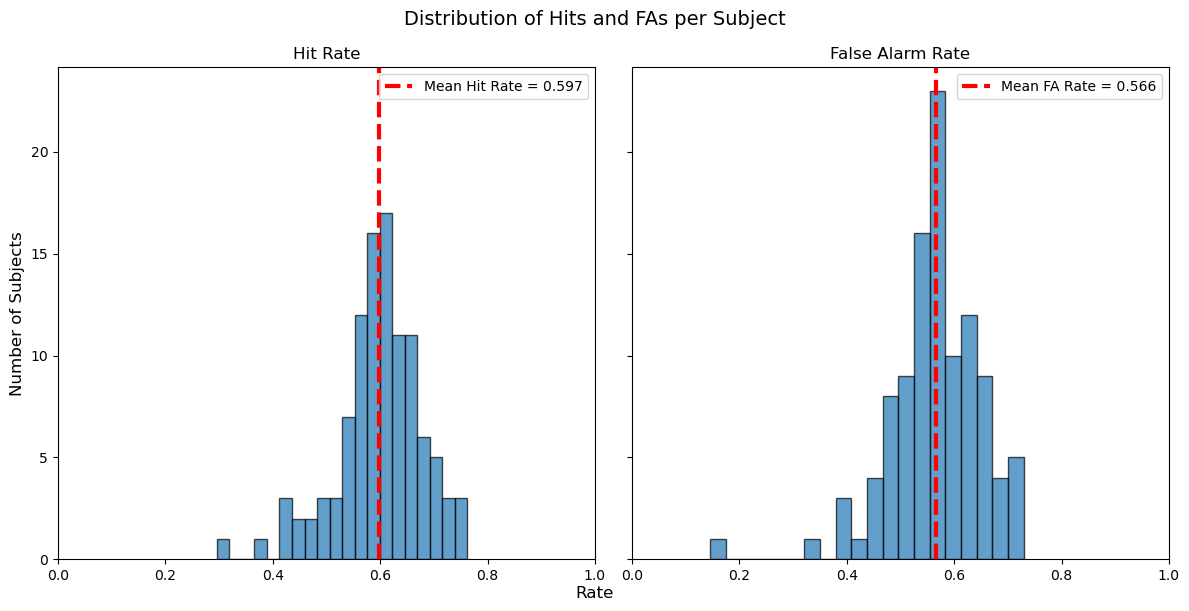

In [170]:
fig, axes = plt.subplots(1, 2, # rows, cols
                         figsize=(12, 6), 
                         sharey=True,sharex=True # share x and y axis scales
                         )


axes[0].hist(dprime_ID['Hit_rate'], bins=20, edgecolor="black", alpha=0.7)
axes[1].hist(dprime_ID['FA_rate'], bins=20, edgecolor="black", alpha=0.7)

axes[0].set_xlim(0, 1)

# Mean
axes[0].axvline(dprime_ID['Hit_rate'].mean(), color="red", 
                linestyle="dashed", linewidth=3, 
                label=f"Mean Hit Rate = {dprime_ID['Hit_rate'].mean():.3f}")
axes[1].axvline(dprime_ID['FA_rate'].mean(), color="red", 
                linestyle="dashed", linewidth=3, 
                label=f"Mean FA Rate = {dprime_ID['FA_rate'].mean():.3f}")

axes[0].set_title("Hit Rate")
axes[1].set_title("False Alarm Rate") 

fig.text(0.5, 0, "Rate", ha="center", fontsize=12)

axes[0].legend()
axes[1].legend()

axes[0].set_ylabel("Number of Subjects", fontsize=12)
fig.suptitle("Distribution of Hits and FAs per Subject", fontsize=14)
plt.tight_layout()
plt.show()

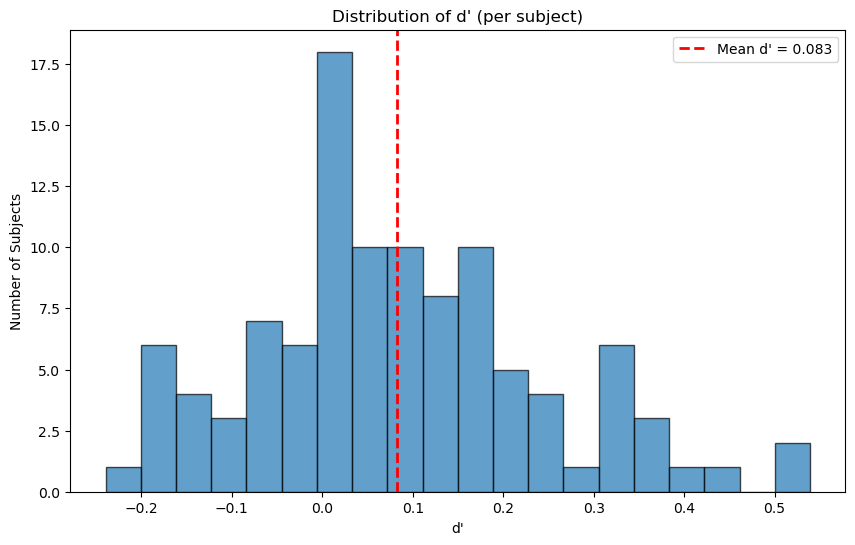

In [171]:
# d'
plt.figure(figsize=(10, 6))
plt.hist(dprime_ID['dprimes'], bins=20, edgecolor="black", alpha=0.7)
plt.axvline(np.mean(dprime_ID['dprimes']), color='red', linestyle='dashed', linewidth=2, label=f'Mean d\' = {np.mean(dprime_ID["dprimes"]):.3f}')
plt.xlabel("d'")
plt.ylabel("Number of Subjects")
plt.title("Distribution of d' (per subject)")
plt.legend()
plt.show()

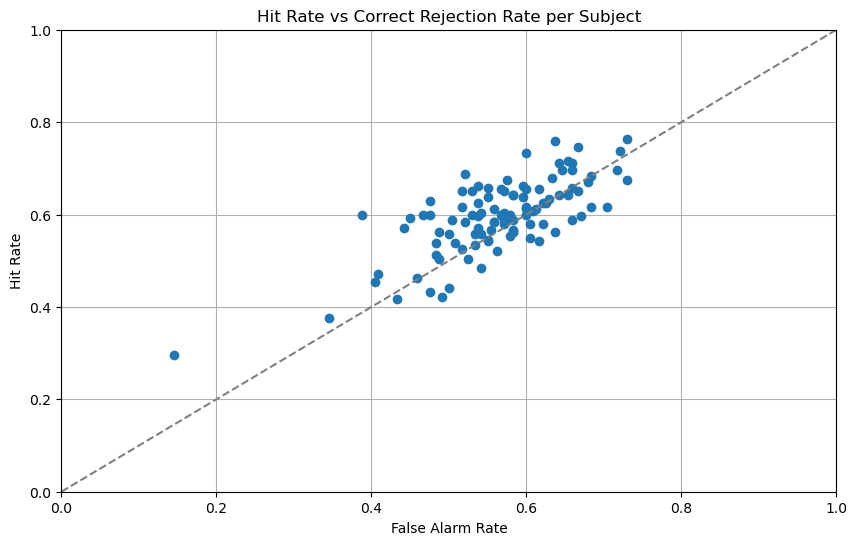

In [172]:
plt.figure(figsize=(10, 6))
plt.plot(dprime_ID['FA_rate'], dprime_ID['Hit_rate'], 'o')
plt.axline((0, 0), slope=1, color='gray', linestyle='dashed')  # Diagonal line
plt.xlabel("False Alarm Rate")
plt.ylabel("Hit Rate")
plt.title("Hit Rate vs Correct Rejection Rate per Subject")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Percent correct by Category

In [173]:
# mean and sem by category and item_type
gr_cat_df_long = (
    filtered_data_test
    .groupby(['category_name','item_type'], observed=True)['cor_ans']
    .agg(prop_correct_mean='mean', sem=lambda x: stats.sem(x))
    .reset_index()
)
gr_cat_df_long

,category_name,item_type,prop_correct_mean,sem
0,Amphibolite,Foil,0.478774,0.017165
1,Amphibolite,Target,0.567217,0.017024
2,Andesite,Foil,0.435142,0.017035
3,Andesite,Target,0.549528,0.017096
4,Anthracite,Foil,0.330189,0.016159
5,Anthracite,Target,0.666274,0.016202
6,Basalt,Foil,0.396226,0.016806
7,Basalt,Target,0.594340,0.016872
8,Bituminous Coal,Foil,0.376179,0.016645
9,Bituminous Coal,Target,0.609670,0.016762


In [174]:
# convert CRs to FAs
gr_cat_df_long['prop_correct_mean'] = gr_cat_df_long['prop_correct_mean'].mask(
    gr_cat_df_long['item_type'] == 'prop_Foil',
    1 - gr_cat_df_long['prop_correct_mean']
)
gr_cat_df_long = gr_cat_df_long.rename(columns={'prop_correct_mean': 'mean_prop_Yes'})

gr_cat_df_long

,category_name,item_type,mean_prop_Yes,sem
0,Amphibolite,Foil,0.478774,0.017165
1,Amphibolite,Target,0.567217,0.017024
2,Andesite,Foil,0.435142,0.017035
3,Andesite,Target,0.549528,0.017096
4,Anthracite,Foil,0.330189,0.016159
5,Anthracite,Target,0.666274,0.016202
6,Basalt,Foil,0.396226,0.016806
7,Basalt,Target,0.594340,0.016872
8,Bituminous Coal,Foil,0.376179,0.016645
9,Bituminous Coal,Target,0.609670,0.016762


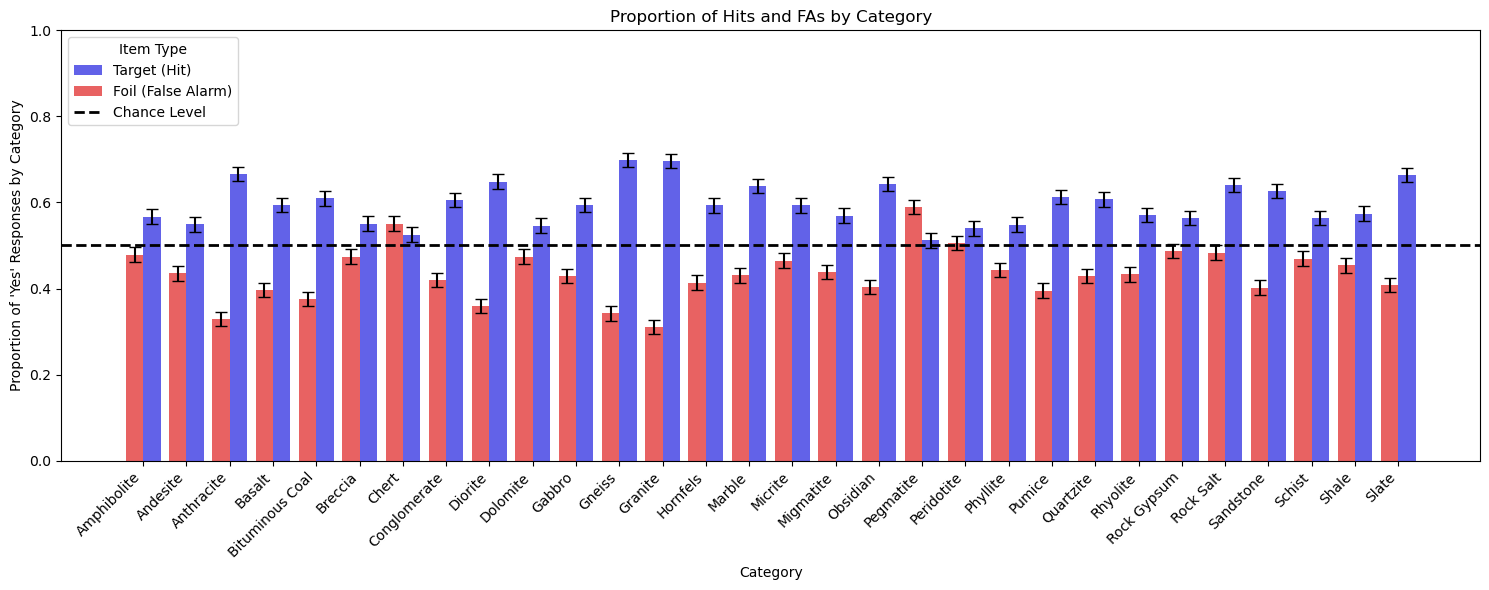

In [177]:
plt.figure(figsize=(15,6))
ax = sns.barplot(
    data=gr_cat_df_long,
    x="category_name",
    y="mean_prop_Yes",
    hue="item_type",
    palette=["red","blue"],
    errorbar=None,
    alpha=0.7
)

# SEM
for i, row in gr_cat_df_long.iterrows():
    # seaborn positions bars by category + hue, so we need to get the correct x location
    x_pos = (
        list(gr_cat_df_long['category_name'].unique()).index(row['category_name'])
        + (-0.2 if row['item_type'] == 'Foil' else 0.2)  # adjust offset for hue
    )
    
    ax.errorbar(
        x=x_pos,
        y=row['mean_prop_Yes'],
        yerr=row['sem'],
        fmt='none',
        c='black',
        capsize=4,
        linewidth=1.5
    )
plt.axhline(0.5, color='black', linestyle='--', linewidth=2, label='Chance Level')

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.xlabel("Category")
plt.ylabel("Proportion of 'Yes' Responses by Category")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[i] for i in [1,0,2]], 
           ['Target (Hit)', 'Foil (False Alarm)', 'Chance Level'],
           loc='upper left', title='Item Type')

plt.title("Proportion of Hits and FAs by Category")
plt.tight_layout()
plt.show()

In [178]:
# Save only the variables you actually need
variables_to_save = {
    'credited_IDs': credited_IDs
    # Add other variables you want to keep
}

with open("Exp1_analysis.pkl", "wb") as f:
    dill.dump(variables_to_save, f)